# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
print(f"There were {len(cities)} cities queried.")

There were 603 cities queried.


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = url + "appid=" + api_key + "&units=" + units + "&q="
weather_df = []

print("""
                             Beginning Data Retrieval
--------------------------------------------------------------------------------
""")
record_count = 1
set_count = 1

for i, city in enumerate(cities):

    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    record_count += 1

    try:
        city_weather = requests.get(query_url+city).json()

        city_clouds = city_weather["clouds"]["all"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        city_humidity = city_weather["main"]["humidity"]
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_wind = city_weather["wind"]["speed"]

        weather_df.append({
            "City": city,
            "Cloudiness": city_clouds,
            "Country": city_country,
            "Date": city_date,
            "Humidity": city_humidity,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Wind Speed": city_wind
        })

    except:
        print("City not found. Skipping...")
        pass
print("""
--------------------------------------------------------------------------------
                                Data Retrieval Complete
--------------------------------------------------------------------------------
""")


                             Beginning Data Retrieval
--------------------------------------------------------------------------------

Processing Record 1 of Set 1 | nepomuk
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | longyearbyen
Processing Record 5 of Set 1 | khatanga
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | hobart
Processing Record 8 of Set 1 | dudinka
Processing Record 9 of Set 1 | keuruu
Processing Record 10 of Set 1 | hambantota
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | uray
Processing Record 13 of Set 1 | teguldet
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | bluff
Processing Record 16 of Set 1 | guasdualito
Processing Record 17 of Set 1 | khani
Processing Record 18 of Set 1 | kapaa
Processing Record 19 of Set 1 | fortuna
Processing Record 20 of Set 1 | bambous virieux
Processing Record 21 of Set 1 | kavaratti
Processing R

Processing Record 37 of Set 4 | nome
Processing Record 38 of Set 4 | sao felix do xingu
Processing Record 39 of Set 4 | severo-kurilsk
Processing Record 40 of Set 4 | saint anthony
Processing Record 41 of Set 4 | liku
Processing Record 42 of Set 4 | richards bay
Processing Record 43 of Set 4 | antofagasta
Processing Record 44 of Set 4 | plavinas
Processing Record 45 of Set 4 | tonk
Processing Record 46 of Set 4 | bajil
Processing Record 47 of Set 4 | havre-saint-pierre
Processing Record 48 of Set 4 | baijiantan
Processing Record 49 of Set 4 | olga
Processing Record 0 of Set 5 | chokurdakh
Processing Record 1 of Set 5 | haines junction
Processing Record 2 of Set 5 | atuona
Processing Record 3 of Set 5 | bassano
Processing Record 4 of Set 5 | loandjili
Processing Record 5 of Set 5 | bur gabo
City not found. Skipping...
Processing Record 6 of Set 5 | stoyba
City not found. Skipping...
Processing Record 7 of Set 5 | manicore
Processing Record 8 of Set 5 | vardo
Processing Record 9 of Set 5

Processing Record 26 of Set 8 | jiazi
Processing Record 27 of Set 8 | yumen
Processing Record 28 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 29 of Set 8 | kieta
Processing Record 30 of Set 8 | souillac
Processing Record 31 of Set 8 | port lincoln
Processing Record 32 of Set 8 | neuquen
Processing Record 33 of Set 8 | shimoda
Processing Record 34 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 35 of Set 8 | callaway
Processing Record 36 of Set 8 | palu
Processing Record 37 of Set 8 | port hardy
Processing Record 38 of Set 8 | bagdarin
Processing Record 39 of Set 8 | yanan
City not found. Skipping...
Processing Record 40 of Set 8 | verkhoyansk
Processing Record 41 of Set 8 | hami
Processing Record 42 of Set 8 | tandil
Processing Record 43 of Set 8 | lolua
City not found. Skipping...
Processing Record 44 of Set 8 | banda aceh
Processing Record 45 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 46 of Set 8 | ponta pora
Processi

City not found. Skipping...
Processing Record 12 of Set 12 | ahipara
Processing Record 13 of Set 12 | antigonish
Processing Record 14 of Set 12 | anantnag
Processing Record 15 of Set 12 | khvoynaya
Processing Record 16 of Set 12 | ostrovnoy
Processing Record 17 of Set 12 | aktash
City not found. Skipping...
Processing Record 18 of Set 12 | kyra
City not found. Skipping...
Processing Record 19 of Set 12 | basco
Processing Record 20 of Set 12 | kamenka
Processing Record 21 of Set 12 | nguiu
City not found. Skipping...
Processing Record 22 of Set 12 | guozhen
Processing Record 23 of Set 12 | kaseda
Processing Record 24 of Set 12 | luorong
Processing Record 25 of Set 12 | gigmoto
Processing Record 26 of Set 12 | nacala
Processing Record 27 of Set 12 | fort collins
Processing Record 28 of Set 12 | berlevag
Processing Record 29 of Set 12 | atambua
Processing Record 30 of Set 12 | onega
Processing Record 31 of Set 12 | yelan
Processing Record 32 of Set 12 | ijaki
City not found. Skipping...
P

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_df = pd.DataFrame(weather_df)
weather_df.to_csv('weather_data.csv', encoding='utf-8', index=False)
weather_df.count()

City          535
Cloudiness    535
Country       535
Date          535
Humidity      535
Lat           535
Lng           535
Max Temp      535
Wind Speed    535
dtype: int64

In [6]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,nepomuk,0,CZ,1555740317,86,49.49,13.58,53.01,3.36
1,rikitea,71,PF,1555740017,80,-23.12,-134.97,79.10,15.79
2,ushuaia,75,AR,1555736400,75,-54.81,-68.31,42.80,33.33
3,longyearbyen,90,NO,1555739400,86,78.22,15.63,28.40,9.17
4,khatanga,2,RU,1555740022,85,71.98,102.47,8.18,6.06


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

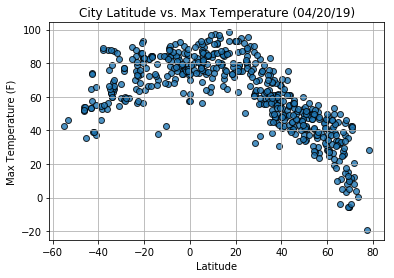

In [10]:
lats = weather_df["Lat"]
max_temps = weather_df["Max Temp"]
humidity = weather_df["Humidity"]
cloudiness = weather_df["Cloudiness"]
wind_speed = weather_df["Wind Speed"]


plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("../Images/Fig1.png")

plt.show()

#### Latitude vs. Humidity Plot

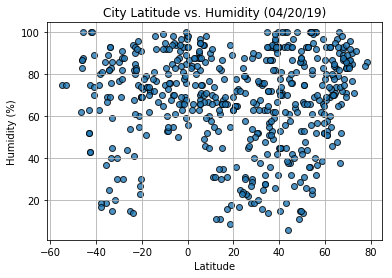

In [11]:
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("../Images/Fig2.png")

plt.show()

#### Latitude vs. Cloudiness Plot

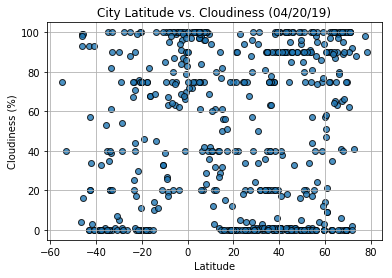

In [12]:
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("../Images/Fig3.png")

plt.show()

#### Latitude vs. Wind Speed Plot

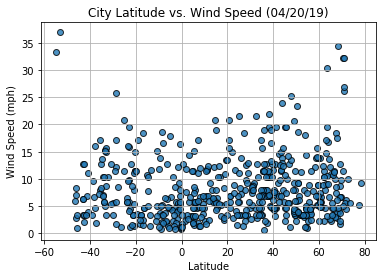

In [13]:
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("../Images/Fig4.png")

plt.show()